In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN, LSTM
#from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData
from test_class import testSVR



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
sns.set_style("darkgrid")


import numpy as np
from tqdm import tqdm



np.random.seed(seed=77)

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')


In [3]:
amplitude = data.data['Amplitude']

In [4]:
amplitude.shape

(600000,)

In [5]:
defectos = data.defectos_set()
defectos

array([  1974,   2606,   4300,   7881,   8805,  10910,  14784,  21795,
        26131,  34973,  42563,  45390,  62017,  70414,  73452,  82966,
        83479,  84043,  88768,  95064,  98391, 132678, 133567, 138344,
       140217, 141360, 141789, 148270, 159933, 183780, 188978, 200273,
       201916, 202035, 219290, 220378, 228223, 230534, 231027, 233524,
       238164, 252464, 259194, 260570, 277752, 279674, 286592, 293255,
       320742, 330655, 333520, 336287, 343099, 349722, 349923, 350159,
       350425, 358583, 364443, 373403, 386628, 418478, 421430, 427961,
       428247, 437346, 441155, 441952, 452156, 454061, 454436, 454917,
       468922, 483199, 486625, 487484, 502024, 509752, 510157, 518591,
       547786, 554495, 559729, 560403, 560594, 567754, 568593, 570364,
       571925, 573421, 575507, 576438, 576613, 591700, 593838, 596729],
      dtype=int64)

In [66]:
amplitude[defectos[0]]

0.0003148372459223415

tengo que crear las secuencias y esas las tengo que fijar o no en el defecto. Entonces tengo dos opciones:
* Iniciar en el defecto y tomo el horizonte + 1 punto a futuro
* El defecto esta a la mitad del arreglo y tomo la mitad de los puntos a futuro y la otra mitad a pasado.

In [76]:
ind1 = defectos[0]
horizonte = 1000
rollingwindow = 50

#así creo la secuencia.
seq_datos = amplitude[ind1:ind1+horizonte+rollingwindow].values

x,y = ut2.create_sequences(seq_datos, horizonte)
x.shape, y.shape

((50, 1000), (50,))

In [77]:
import pickle
filename = 'SVR_model.sav'
model = pickle.load(open(filename, 'rb'))
model

SVR(C=10, coef0=0.5, gamma='auto', kernel='sigmoid')

In [79]:
pred = ut2.rollingWindowPrediction_SVR(model, x, 50)
pred = np.array(pred)
pred.shape

100%|██████████| 50/50 [00:00<00:00, 136.46it/s]


(50, 50)

algo no me calza, pero no se que es.

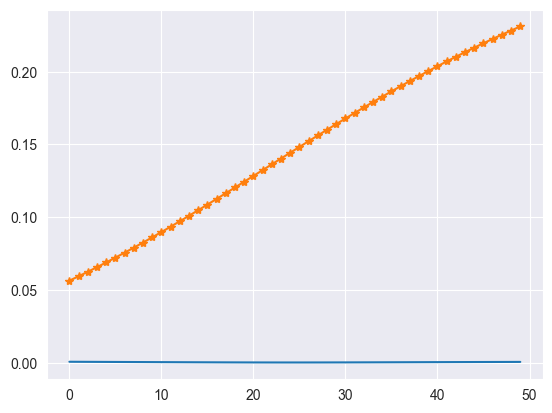

In [88]:
plt.plot(y)
plt.plot(pred[0], '-*')

In [80]:
import errores as er
x = er.error_metrics(pred[:-49], y, 50)

ValueError: Found input variables with inconsistent numbers of samples: [0, 1]